<a href="https://colab.research.google.com/github/bindersarah/Deep_Learning/blob/main/FINAL_RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = "/content/drive/MyDrive/Fall_2025/Deep_Learning/DL_Project/Final Submission/"
#FOLDERNAME = "/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import models, transforms

import pandas as pd
from PIL import Image
import io
from IPython.display import display
from torchvision import transforms
import torch

# import torchvision.datasets as dset
# import torchvision.transforms as T

import numpy as np

USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader
from torchvision import transforms

In [ ]:
import torch.nn.functional as F

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

Load in EMoSet

In [ ]:
train_dataset = load_dataset("Woleek/EmoSet-118K", split="train")
test_dataset = load_dataset("Woleek/EmoSet-118K", split="test")
val_dataset = load_dataset("Woleek/EmoSet-118K", split="val")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

data/train-00000-of-00018.parquet:   0%|          | 0.00/509M [00:00<?, ?B/s]

data/train-00001-of-00018.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

data/train-00002-of-00018.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

data/train-00003-of-00018.parquet:   0%|          | 0.00/507M [00:00<?, ?B/s]

data/train-00004-of-00018.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

data/train-00005-of-00018.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

data/train-00006-of-00018.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

data/train-00007-of-00018.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

data/train-00008-of-00018.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

data/train-00009-of-00018.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

data/train-00010-of-00018.parquet:   0%|          | 0.00/507M [00:00<?, ?B/s]

data/train-00011-of-00018.parquet:   0%|          | 0.00/500M [00:00<?, ?B/s]

data/train-00012-of-00018.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

data/train-00013-of-00018.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

data/train-00014-of-00018.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

data/train-00015-of-00018.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

data/train-00016-of-00018.parquet:   0%|          | 0.00/507M [00:00<?, ?B/s]

data/train-00017-of-00018.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

data/val-00000-of-00002.parquet:   0%|          | 0.00/282M [00:00<?, ?B/s]

data/val-00001-of-00002.parquet:   0%|          | 0.00/283M [00:00<?, ?B/s]

data/test-00000-of-00004.parquet:   0%|          | 0.00/422M [00:00<?, ?B/s]

data/test-00001-of-00004.parquet:   0%|          | 0.00/430M [00:00<?, ?B/s]

data/test-00002-of-00004.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

data/test-00003-of-00004.parquet:   0%|          | 0.00/422M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/94481 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/5905 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/17716 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

In terms of labels:
- Amusement = 0
- Awe = 1
- Contentment = 2
- Excitement = 3
- Anger = 4
- Disgust = 5
- Fear = 6
- Saddness = 7

We want to turn them into:
- Amusement = 0
- Awe = 0
- Contentment = 0
- Excitement = 0
- Anger = 1
- Disgust = 1
- Fear = 1
- Saddness = 1
WHERE 0 = Positive, 1 = Negative!


Transforming EmoSet data into PyTorch compatible data

Emoset Authors: For 'train' phase: Random resize crop to 224, random horizontal flip, conversion to tensor, and normalization.
For 'val' and 'test' phases: Resize to 224, center crop to 224, conversion to tensor, and normalization.

## Changes made below
removed color jitter from train (actually probably important info re emotion)
removed attributes in transform (for now)

In [ ]:
train_transform = transforms.Compose([
    #THESE FIRST COUPLE PARTS are essentially doing "data augmentation" without using up any memory
    transforms.RandomResizedCrop(224),  # Randomly crop and resize to 224x224
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Randomly adjust color properties
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Define transform
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

The above are transformers, or "pre-processing steps"

In [ ]:
# define for per-sample transformations. use wrapper function bc hugging face fx only allows one argumnet (batch) but want to load different transforms depending on the set

def transform_wrapper(transforms=train_transform):
    def transform_batch(batch):
        pixel_values = [transforms(img.convert("RGB")) for img in batch["image"]]
        labels = [0 if x <= 3 else 1 for x in batch["label"]]
        return {"pixel_values": pixel_values, "labels": labels}
    return transform_batch


# turn single values into tensors of pixel values ?
def collate_fn(batch):
    # Stack pixel tensors
    pixel_values = torch.stack([item["pixel_values"] for item in batch])
    labels = torch.tensor([item["labels"] for item in batch], dtype=torch.long)

    return {
        "pixel_values": pixel_values,
        "labels": labels}

Creating a way to transform single values into tensors!

#Part 1: Training EmoSet

##Transfer Learning from ImageNet

NOW we finally load each set using the prior defined functions in order to create batches of info usable by PyTorch

In [ ]:
# Create DataLoader
test_dataset.set_transform(transform_wrapper(transforms=val_transform))
train_dataset.set_transform(transform_wrapper(transforms=train_transform))
val_dataset.set_transform(transform_wrapper(transforms=val_transform))

test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, collate_fn=collate_fn)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=False, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, collate_fn=collate_fn)

Functions to check accuracy of all our EmoSet Model

In [ ]:
def check_accuracy_EmoSet(loader, model, N=256):
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for batch in loader:
            x = batch['pixel_values']
            y = batch['labels']
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

This will be used to TRAIN our created models

In [ ]:

print_every = 100

def train_EmoSet(train_load, val_load, model, optimizer,epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.

    Inputs:
    - train_load: the train_loader
    - val_load: the val_loader
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, batch in enumerate(train_load):
            x = batch['pixel_values']
            y = batch['labels']
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_EmoSet(val_loader, model)
                print()

Lets try an EmoResNet model WITHOUT adding variables outside of just the image and label

In [ ]:
class EmoResNet(nn.Module):
  def __init__(self, num_classes=2, train_base_model=False):
      super().__init__()
      weights = ResNet50_Weights.IMAGENET1K_V1
      base = resnet50(weights=weights)

      # optionally train or freeze base model parameters
      for param in base.parameters():
            param.requires_grad = train_base_model

      self.base_model = nn.Sequential(*list(base.children()))[:-2] # base.children are all the modules within resent. remove avg pool and fc

      # add new model
      self.new_model = nn.Sequential(
        nn.Conv2d(2048, 512, kernel_size=5, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(512, 128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Dropout(p=0.4),
        nn.MaxPool2d(2),

        nn.Flatten(),
        nn.Linear(128, 8),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(8, num_classes)
    )

  def forward(self, x):
    x = self.base_model(x)
    x = self.new_model(x)
    return x


In [ ]:
model = EmoResNet(num_classes=2, train_base_model=True)

# # use adam optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3) # authors use default lr and adam

#train_EmoSet(train_loader, val_loader, model, optimizer, epochs=3)
train_EmoSet(train_loader, val_loader, model, optimizer, epochs=5)

# # Suppose your model variable is called `model`
save_path = FOLDERNAME + "finetuned_modelEmoSet.pth"

# # Recommended: save state_dict (weights only)
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 244MB/s]


Iteration 0, loss = 0.6970
Got 3941 / 5905 correct (66.74)

Iteration 100, loss = 0.4608
Got 4583 / 5905 correct (77.61)

Iteration 200, loss = 0.5057
Got 4609 / 5905 correct (78.05)

Iteration 300, loss = 0.3896
Got 4531 / 5905 correct (76.73)

Iteration 0, loss = 0.4259
Got 4679 / 5905 correct (79.24)

Iteration 100, loss = 0.3827
Got 4789 / 5905 correct (81.10)

Iteration 200, loss = 0.5060
Got 4787 / 5905 correct (81.07)

Iteration 300, loss = 0.4246
Got 4875 / 5905 correct (82.56)

Iteration 0, loss = 0.3723
Got 4568 / 5905 correct (77.36)

Iteration 100, loss = 0.3772
Got 4686 / 5905 correct (79.36)

Iteration 200, loss = 0.4445
Got 4717 / 5905 correct (79.88)

Iteration 300, loss = 0.3612
Got 4822 / 5905 correct (81.66)

Iteration 0, loss = 0.3781
Got 4804 / 5905 correct (81.35)

Iteration 100, loss = 0.3820
Got 4871 / 5905 correct (82.49)

Iteration 200, loss = 0.4511
Got 4845 / 5905 correct (82.05)

Iteration 300, loss = 0.3840
Got 4918 / 5905 correct (83.29)

Iteration 0, los

Here, we run and save the model before testing it on our Test Set! We can then load it whenever we want and run it

In [ ]:
# Recreate the same model architecture
model = EmoResNet(num_classes=2, train_base_model=True)
save_path = FOLDERNAME + "finetuned_modelEmoSet.pth"

# Load weights
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)
model.eval()  # important: sets dropout/batchnorm to inference mode

print("Model loaded and ready for inference.")


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 224MB/s]


Model loaded and ready for inference.


In [ ]:
print("Checking accuracy on test set:")
check_accuracy_EmoSet(test_loader, model)

Checking accuracy on test set:
Got 14855 / 17716 correct (83.85)


#Step 2: VALIDATE on NAPS/OASIS

##Pull in and set up Data

In [ ]:
def load_file(filepath,file_types):

  #Creating a list that returns all filepaths
  all_files = []

  #os.walk goes through each file and each directory. recursively joins all
  for root,dirs,files in os.walk(filepath):
    for file in files:
      if any(file.endswith(ft) for ft in file_types):
        all_files.append(os.path.join(root,file))

  return all_files

In [ ]:
from pickle import FALSE
from torch.utils.data import Dataset

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, img_list, image_name, valence, arousal, source, augmentations = None, transform = None, val_continuous = False):
        super(MyDataset, self).__init__()
        self.img_list = img_list
        self.augmentations = augmentations
        self.image_name = image_name
        self.transform = transform
        self.arousal = arousal
        self.valence = valence
        self.source = source
        self.continuous = val_continuous

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        image_path = self.img_list[idx]

        """
        Meant for Binary Valence
        """
        valence_val = None
        if self.continuous:
          """
          Meant for Continuous Valence
          """
          valence_val = self.valence[idx]
        else:
          source = self.source[idx]
          cutoff = 7
          if source == "NAPS" or source == "Explore":
            cutoff = 9
          #for the NAPS data, rating goes from extremely negative to extremely positive!
          #For OASIS data, 4 = Neutral, 1 is negative, and 7 is positive
          if self.valence[idx] < float(cutoff/2) and source == "Explore":
            valence_val = 0
          elif self.valence[idx] >= float(cutoff/2) and source == "Explore":
            valence_val = 1
          elif self.valence[idx] < float(cutoff/2):
            valence_val = 1
          else:
            valence_val = 0

        arousal_val = self.arousal[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
          pixel_values = self.transform(image)

        return {"pixel_values": pixel_values, "valence": valence_val, "arousal": arousal_val, "image_path": image_path}

In [ ]:
# Define custom collate_fn to ignore non-tensor fields / tconvert arrays to tensors
def collate_fn_NAPSOASIS(batch): # batch is a list of dictionaries
    pixel_values = torch.stack([item["pixel_values"] for item in batch])
    valence = torch.tensor([item["valence"] for item in batch])
    arousal = torch.tensor([item["arousal"] for item in batch])

    return {"pixel_values": pixel_values, "valence": valence, "arousal": arousal}


In [ ]:
import random

def remove_samples(min,max,df, remove):
  """
    set is the set of data
    min is minimum of where to remove
    max is maximum of where to remove
    remove is ratio of how much to remove
  """

  copy_df = df[(df["All_ValenceM"]>=min) & (df["All_ValenceM"]<=max)]
  num_in_between = copy_df.shape[0]
  to_remove = int(num_in_between*remove)

  indexes = list(copy_df.index.values)
  random_items = random.sample(indexes, to_remove)

  df_cleaned = df.drop(df.index[random_items]).reset_index(drop=True)

  return df_cleaned

In [ ]:
import os

#PULL IN ALL FILES:
NAPS_path = FOLDERNAME + "NAPS_data"
OASIS_path  = FOLDERNAME + "OASIS_data"

mapping_path_NAPS = load_file(NAPS_path,["table.csv"])[0]
NAPS_data = pd.DataFrame(pd.read_csv(mapping_path_NAPS))
NAPS_data["source"] = "NAPS"

#HERE, let us attempt to CUT DOWN on some "neutral" values - AKA, remove 50% of samples between 4-5
NAPS_resampled = remove_samples(4,5,NAPS_data, 0)

arousal_mean = np.mean(NAPS_resampled["All_ArousalM"])
arousal_stdv = np.std(NAPS_resampled["All_ArousalM"])
NAPS_resampled["All_ArousalM"] = (NAPS_resampled["All_ArousalM"] - arousal_mean)/(arousal_stdv) # normalizing

mapping_path_OASIS = load_file(OASIS_path,[".csv"])
OASIS_data = pd.DataFrame(pd.read_csv(mapping_path_OASIS[0]))
OASIS_data = OASIS_data.rename(columns = {'Valence_mean':'All_ValenceM', 'Arousal_mean':'All_ArousalM','Theme': 'ID'})
OASIS_data["source"] = "OASIS"

OASIS_resampled = remove_samples(3,4,OASIS_data, 0)

arousal_mean = np.mean(OASIS_resampled["All_ArousalM"])
arousal_stdv = np.std(OASIS_resampled["All_ArousalM"])
OASIS_resampled["All_ArousalM"] = (OASIS_resampled["All_ArousalM"] - arousal_mean)/(arousal_stdv) # normalizing

# actually load in images
NAPS_OASIS_data = pd.concat([NAPS_resampled, OASIS_resampled], ignore_index=True, axis = 0) # combines df

NAPS_image_path = NAPS_path + "/NAPS_H"
list_of_paths1 = load_file(NAPS_image_path,[".jpg"])
list_of_paths2 = (load_file(OASIS_path,[".jpg"]))
list_of_paths = list_of_paths1+list_of_paths2
image_data = pd.DataFrame(list_of_paths, columns = ["image_path"])
image_data["image"] = image_data["image_path"].apply(lambda x: x.split("/")[-1].split(".")[-2])

# merge image data with labels
image_data_final = pd.merge(image_data, NAPS_OASIS_data, left_on = "image", right_on = "ID", how = "inner")
image_data_final = image_data_final.drop(["image"], axis = 1)

def normalize_valence():
  arousal_mean_OASIS = np.mean(OASIS_data["All_ArousalM"])
  arousal_stdv_OASIS = np.std(OASIS_data["All_ArousalM"])
  OASIS_data["All_ArousalM"] = (OASIS_data["All_ArousalM"] - arousal_mean_OASIS)/(arousal_stdv_OASIS) # normalizing
  arousal_mean_NAPS = np.mean(NAPS_data["All_ArousalM"])
  arousal_stdv_NAPS = np.std(NAPS_data["All_ArousalM"])
  NAPS_data["All_ArousalM"] = (NAPS_data["All_ArousalM"] - arousal_mean_NAPS)/(arousal_stdv_NAPS) # normalizing

  valence_mean_NAPS = np.mean(NAPS_data["All_ValenceM"])
  valence_stdv_NAPS = np.std(NAPS_data["All_ValenceM"])
  NAPS_data["All_ValenceM"] = (NAPS_data["All_ValenceM"] - valence_mean_NAPS)/(valence_stdv_NAPS) # normalizing
  valence_mean_OASIS = np.mean(OASIS_data["All_ValenceM"])
  valence_stdv_OASIS = np.std(OASIS_data["All_ValenceM"])
  OASIS_data["All_ValenceM"] = (OASIS_data["All_ValenceM"] - valence_mean_OASIS)/(valence_stdv_OASIS) # normalizing

  # actually load in images
  NAPS_OASIS_data = pd.concat([NAPS_data, OASIS_data], ignore_index=True, axis = 0) # combines df

  # merge image data with labels
  image_data_final = pd.merge(image_data, NAPS_OASIS_data, left_on = "image", right_on = "ID", how = "inner")
  image_data_final = image_data_final.drop(["image"], axis = 1)

  return image_data_final, valence_mean_NAPS, valence_stdv_NAPS, arousal_mean_NAPS, arousal_stdv_NAPS

In [ ]:
dataset_val = MyDataset(img_list=image_data_final["image_path"],image_name = image_data_final["ID"], valence = image_data_final['All_ValenceM'], arousal = image_data_final['All_ArousalM'], source = image_data_final['source'], transform=val_transform, val_continuous = False)
val_loader_NAPS = DataLoader(dataset_val, batch_size=32, shuffle=False, collate_fn = collate_fn_NAPSOASIS)

##Adapted checks for NAPS/OASIS

In [ ]:
def check_accuracy_NAPSOASISVAL(loader, model, N=256):

    model.eval()  # set model to evaluation mode
    num_correct = 0
    num_samples = 0

    with torch.no_grad():
        for batch in loader:
            x = batch['pixel_values'].to(device)
            y_valence = batch["valence"].to(device=device, dtype=torch.long)

            valence_pred = model(x)

            # emotion accuracy
            _, preds = valence_pred.max(1)
            num_correct += (preds == y_valence).sum()
            num_samples += preds.size(0)

            # # bright acc
            # mae_brightness += F.l1_loss(bright_pred, y_bright, reduction='sum').item()
            # #mae_brightness += torch.mean(torch.abs(bright_pred - y_bright))

    acc = 100.0 * num_correct / num_samples

    print(f'Valence Accuracy: {num_correct}/{num_samples} ({acc:.2f}%) ')

Great, now we have data loaded in! We need to attempt to use this as a VALIDATION SET - how do we do this? Let us test on the Original EmoSet Model, but this time, send in NAPS/OASIS validation set to see transferability!

In [ ]:
print("Checking accuracy on NAPS/OASIS set:")
check_accuracy_NAPSOASISVAL(val_loader_NAPS, model)

Checking accuracy on NAPS/OASIS set:
Valence Accuracy: 1459/2254 (64.73%) 


#IMPROVE model for NAPS/OASIS

In [ ]:
class NapOasEmoResNet(nn.Module):
  def __init__(self, num_classes=2, train_base_model=False):
      super().__init__()
      weights = ResNet50_Weights.IMAGENET1K_V1
      base = resnet50(weights=weights)

      # optionally train or freeze base model parameters
      for param in base.parameters():
            param.requires_grad = train_base_model

      self.base_model = nn.Sequential(*list(base.children()))[:-2] # base.children are all the modules within resent. remove avg pool and fc

      self.new_model = nn.Sequential(
       nn.Conv2d(2048, 512, kernel_size=5, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(2),          # ← downsample early (critical)

        nn.Conv2d(512, 256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.MaxPool2d(2),

        nn.Conv2d(256, 128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.01), # inplace=F
        nn.Dropout(0.2),
        nn.AdaptiveAvgPool2d((1,1)),

        nn.Flatten(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(64, num_classes)
    )

  def forward(self, x):
    x = self.base_model(x)
    x = self.new_model(x)
    return x

##Train and test NEW model on original EmoSet Data

In [ ]:
val_model = NapOasEmoResNet(num_classes=2, train_base_model=True)

# use adam optimizer
#Increase the learning rate
optimizer = optim.Adam(val_model.parameters(), lr=1e-3)

#Use Data Augmentation techniques to increase diversity!
#train_dataset.set_transform(transform_batch_train_aug)
train_dataset.set_transform(transform_wrapper(transforms=train_transform))
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=False, collate_fn=collate_fn)

#Increase from 3 to 5 epochs
train_EmoSet(train_loader, val_loader, val_model, optimizer, epochs=5)

save_path = FOLDERNAME + "finetuned_model_NapOas.pth"

# Recommended: save state_dict (weights only)
torch.save(val_model.state_dict(), save_path)

print(f"Model saved to {save_path}")

OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 284.12 MiB is free. Process 14705 has 14.46 GiB memory in use. Of the allocated memory 13.93 GiB is allocated by PyTorch, and 428.45 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# Recreate the same model architecture
val_model = NapOasEmoResNet(num_classes=2, train_base_model=True)
save_path = FOLDERNAME + "finetuned_model_NapOas.pth"

# Load weights
val_model.load_state_dict(torch.load(save_path, map_location=device))
val_model.to(device)
val_model.eval()  # important: sets dropout/batchnorm to inference mode

print("Model loaded and ready for inference.")

Model loaded and ready for inference.


In [ ]:
print("Checking accuracy on test set:")
check_accuracy_EmoSet(test_loader, val_model) # EmoSet test

Checking accuracy on test set:
Got 14946 / 17716 correct (84.36)


## NOW lets try the NEW trained model on NPAS/OASIS VALIDATION model... again :)

In [ ]:
print("Checking accuracy on NAPS/OASIS set:")
check_accuracy_NAPSOASISVAL(val_loader_NAPS, val_model) # NAPS + OASIS emoset

Checking accuracy on NAPS/OASIS set:
Valence Accuracy: 1311/2046 (64.08%) 


#STEP 3: Pull in Arousal data from NAPS/OASIS, enhancing our best model prior to ensure good performance during classification!

##PREP data, doing train-test split

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Adapt for predicting arousal and valence
# train test split NAPS/OASIS

# split
Xtr, Xts = train_test_split(image_data_final, test_size=0.1, random_state=42)
Xtr, Xval = train_test_split(Xtr, test_size=0.1, random_state=42)
Xtr.reset_index(drop=True, inplace=True)
Xts.reset_index(drop=True, inplace=True)
Xval.reset_index(drop=True, inplace=True)

# create dataset class
dataset_train = MyDataset(img_list=Xtr["image_path"],image_name = Xtr["ID"], valence = Xtr['All_ValenceM'], arousal = Xtr['All_ArousalM'], source = Xtr['source'], transform=train_transform, val_continuous = False)
dataset_test = MyDataset(img_list=Xts["image_path"],image_name = Xts["ID"], valence = Xts['All_ValenceM'], arousal = Xts['All_ArousalM'], source = Xts['source'], transform=train_transform, val_continuous = False)
dataset_val = MyDataset(img_list=Xval["image_path"],image_name = Xval["ID"], valence = Xval['All_ValenceM'], arousal = Xval['All_ArousalM'], source = Xval['source'], transform=train_transform, val_continuous = False)

# create dataloader object
train_loader_NAPS = DataLoader(dataset_train, batch_size=128, shuffle=False, collate_fn = collate_fn_NAPSOASIS)
test_loader_NAPS = DataLoader(dataset_test, batch_size=128, shuffle=False, collate_fn = collate_fn_NAPSOASIS)
val_loader_NAPS = DataLoader(dataset_val, batch_size=128, shuffle=False, collate_fn = collate_fn_NAPSOASIS)


##Set up the NAPS/OASIS checks, ensuring that we account for 2 heads since we need to check for both valence AND accuracy!

In [ ]:
value_range_V = image_data_final['All_ValenceM'].max() - image_data_final['All_ValenceM'].min()
value_range_A = image_data_final['All_ArousalM'].max() - image_data_final['All_ArousalM'].min()

In [ ]:
from sklearn.metrics import r2_score

def check_accuracy_NAPSOASIS(loader, model, N=256):

    model.eval()  # set model to evaluation mode
    valence_acc = 0
    num_samples = 0
    arousal_acc = 0
    arousal_mae_L1 = 0

    all_aro_true = []
    all_aro_pred = []

    with torch.no_grad():
        for batch in loader:
            x = batch['pixel_values'].to(device)
            y_valence = batch["valence"].to(device=device, dtype=torch.long)
            y_arousal = batch["arousal"].to(device=device, dtype=torch.float)

            valence_pred, arousal_pred = model(x)

            # valence accuracy
            _, preds = valence_pred.max(1)
            valence_acc += (preds == y_valence).sum()
            num_samples += preds.size(0)

            # arousal accuracy
            arousal_mae_L1 += F.l1_loss(arousal_pred, y_arousal, reduction='sum').item()

            all_aro_true.extend(y_arousal.cpu().numpy().flatten())
            all_aro_pred.extend(arousal_pred.cpu().numpy().flatten())

    mae_aro = arousal_mae_L1 / num_samples

    mae_aro_norm = mae_aro / value_range_A
    mae_aro_acc_like = 100*(1 - mae_aro_norm)

    aro_r2 = r2_score(all_aro_true, all_aro_pred)

    val_acc = 100.0 * valence_acc / num_samples

    print(f'Valence Accuracy: {val_acc:.4f}%\n'
          f'Arousal MAE Accuracy: {mae_aro_acc_like:.4f}%\n'
          f'Arousal Accuracy with R2: {aro_r2:.4f}'
          )


print_every = 100

def train_NAPSOASIS(model, optimizer, epochs=1): #scale_param=0.6
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, batch in enumerate(train_loader_NAPS):
            x = batch['pixel_values'].to(device)
            y_valence = batch["valence"].to(device=device, dtype=torch.long)
            y_arousal = batch["arousal"].to(device=device, dtype=torch.float)

            valence_pred, arousal_pred = model(x)

            #compute losses
            loss_valence = F.cross_entropy(valence_pred, y_valence)
            loss_arousal = F.mse_loss(arousal_pred, y_arousal)

            # combine losswes
            loss = loss_valence + loss_arousal # removed scale_param

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print(f"Iter {t} | Total Loss: {loss.item():.4f} | Valence Loss: {loss_valence.item():.4f} | Arousal Loss: {loss_arousal.item():.4f}")
                check_accuracy_NAPSOASIS(val_loader_NAPS, model)
                print()


In [ ]:
class ValandArousal(nn.Module):
  def __init__(self, weight_path, num_classes=2, train_base_model=False): # consider True
        super().__init__()

        # 1. base model architecture
        self.base = NapOasEmoResNet(num_classes=2, train_base_model=train_base_model)

        # 2. pretrained weights
        state = torch.load(weight_path, map_location=device)
        self.base.load_state_dict(state)

        # 3. optional train of base model
        for p in self.base.parameters():
            p.requires_grad = train_base_model

        # backbone model
        # get the layers of new_model EXCEPT the last four layers
        new_layers = list(self.base.new_model.children())[:-5]

        self.emoset_model = nn.Sequential(
            self.base.base_model,   # full ResNet backbone
            *new_layers             # your conv head up to Flatten()
        )

          #self.feature_dim = 256 #128 # After flatten: 128-dimensional feature vector

        # valence head: this can just be the same as our model
        self.valence_model = nn.Sequential(
          nn.Flatten(),
          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Dropout(0.4),
          nn.Linear(64, num_classes)
        )

        # arousal head:
        self.arousal_model = Arousal_Model(in_channels=128) # consider adjusting and/or binarizing

  def forward(self, x):
        # shared backbone
        x = self.emoset_model(x)   # → (N,128) (64, 128)

        # two heads
        valence_out = self.valence_model(x)
        arousal_out = self.arousal_model(x).squeeze(1)
        return valence_out, arousal_out


In [ ]:
class Arousal_Model(nn.Module):
    def __init__(self, in_channels=2048):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 512, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, 1),   # in_features=512, out_features=1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# define path where weights are stored
weights_path = FOLDERNAME + "finetuned_model_NapOas.pth"

# define model and optimizer
ValandArousal_model_cat = ValandArousal(weight_path=weights_path)
optimizer = optim.Adam(ValandArousal_model_cat.parameters(), lr=1e-3)

# train and print val accuracy
train_NAPSOASIS(ValandArousal_model_cat, optimizer, epochs=5)

# save
save_path = FOLDERNAME + "finetuned_model_ValandArousal.pth"




Iter 0 | Total Loss: 1.8833 | Valence Loss: 0.7468 | Arousal Loss: 1.1364
Valence Accuracy: 55.1724%
Arousal MAE Accuracy: 84.7670%
Arousal Accuracy with R2: -0.2526

Iter 0 | Total Loss: 1.5046 | Valence Loss: 0.5824 | Arousal Loss: 0.9222
Valence Accuracy: 77.3399%
Arousal MAE Accuracy: 86.0565%
Arousal Accuracy with R2: -0.0412

Iter 0 | Total Loss: 1.4800 | Valence Loss: 0.5717 | Arousal Loss: 0.9083
Valence Accuracy: 76.3547%
Arousal MAE Accuracy: 86.4088%
Arousal Accuracy with R2: -0.0067

Iter 0 | Total Loss: 1.4835 | Valence Loss: 0.5879 | Arousal Loss: 0.8956
Valence Accuracy: 74.8768%
Arousal MAE Accuracy: 86.5224%
Arousal Accuracy with R2: 0.0093

Iter 0 | Total Loss: 1.4501 | Valence Loss: 0.5916 | Arousal Loss: 0.8585
Valence Accuracy: 74.3842%
Arousal MAE Accuracy: 86.4192%
Arousal Accuracy with R2: 0.0025



In [ ]:
# # Recommended: save state_dict (weights only)
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Model saved to /content/drive/MyDrive/Deep Learning/DL_Project/finetuned_model_ValandArousal.pth


In [ ]:
print("Checking accuracy on test set:")
check_accuracy_NAPSOASIS(test_loader_NAPS, ValandArousal_model_cat) # Arousal Test

Checking accuracy on test set:
Valence Accuracy: 74.3363%
Arousal MAE Accuracy: 85.8918%
Arousal Accuracy with R2: 0.0156


In [ ]:
# create dataset class
image_data_final, final_v_mean, final_v_stdv, final_a_mean, final_a_stdv = normalize_valence()


In [ ]:
# split
Xtr, Xts = train_test_split(image_data_final, test_size=0.2, random_state=42)
Xtr, Xval = train_test_split(Xtr, test_size=0.4, random_state=42)
Xtr.reset_index(drop=True, inplace=True)
Xts.reset_index(drop=True, inplace=True)
Xval.reset_index(drop=True, inplace=True)

dataset_train = MyDataset(img_list=Xtr["image_path"],image_name = Xtr["ID"], valence = Xtr['All_ValenceM'], arousal = Xtr['All_ArousalM'], source = Xtr['source'], transform=train_transform, val_continuous = True)
dataset_test = MyDataset(img_list=Xts["image_path"],image_name = Xts["ID"], valence = Xts['All_ValenceM'], arousal = Xts['All_ArousalM'], source = Xts['source'], transform=train_transform, val_continuous = True)
dataset_val = MyDataset(img_list=Xval["image_path"],image_name = Xval["ID"], valence = Xval['All_ValenceM'], arousal = Xval['All_ArousalM'], source = Xval['source'], transform=train_transform, val_continuous = True)

# create dataloader object
train_loader_NAPS = DataLoader(dataset_train, batch_size=32, shuffle=False, collate_fn = collate_fn_NAPSOASIS)
test_loader_NAPS = DataLoader(dataset_test, batch_size=32, shuffle=False, collate_fn = collate_fn_NAPSOASIS)
val_loader_NAPS = DataLoader(dataset_val, batch_size=32, shuffle=False, collate_fn = collate_fn_NAPSOASIS)

In [ ]:
value_range_V = image_data_final['All_ValenceM'].max() - image_data_final['All_ValenceM'].min()
value_range_A = image_data_final['All_ArousalM'].max() - image_data_final['All_ArousalM'].min()

In [ ]:
from PIL import Image

from sklearn.metrics import r2_score

def check_accuracy_NAPSOASISCON(loader, model, N=256):

    model.eval()  # set model to evaluation mode
    num_samples = 0
    arousal_mae_L1, valence_mae_L1 = 0, 0

    all_val_true = []
    all_val_pred = []
    all_aro_true = []
    all_aro_pred = []

    with torch.no_grad():
        for batch in loader:
            x = batch['pixel_values'].to(device)
            y_valence = batch["valence"].to(device=device, dtype=torch.float)
            y_arousal = batch["arousal"].to(device=device, dtype=torch.float)

            valence_pred, arousal_pred = model(x)

            num_samples += y_valence.size(0) # batch size
            valence_mae_L1 += F.l1_loss(valence_pred, y_valence, reduction='sum').item()
            arousal_mae_L1 += F.l1_loss(arousal_pred, y_arousal, reduction='sum').item()

            all_val_true.extend(y_valence.cpu().numpy().flatten())
            all_val_pred.extend(valence_pred.cpu().numpy().flatten())
            all_aro_true.extend(y_arousal.cpu().numpy().flatten())
            all_aro_pred.extend(arousal_pred.cpu().numpy().flatten())

    mae_val = valence_mae_L1 / num_samples
    mae_aro = arousal_mae_L1 / num_samples
    mae_val_norm = mae_val / value_range_V
    mae_aro_norm = mae_aro / value_range_A
    mae_val_acc_like = 100*(1 - mae_val_norm)
    mae_aro_acc_like = 100*(1 - mae_aro_norm)

    val_r2 = r2_score(all_val_true, all_val_pred)
    aro_r2 = r2_score(all_aro_true, all_aro_pred)

    print(f'Valence Accuracy MAE: {mae_val_acc_like:.4f}%\n'
          f'Arousal Accuracy MAE: {mae_aro_acc_like:.4f}%\n'
          f'Valence Accuracy R2: {val_r2:.4f}\n'
          f'Arousal Accuracy R2: {aro_r2:.4f}\n'
          )


print_every = 100

def train_NAPSOASISCON(model, optimizer, epochs=1): #scale_param=0.6
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, batch in enumerate(train_loader_NAPS):
            x = batch['pixel_values'].to(device)
            y_valence = batch["valence"].to(device=device, dtype=torch.float)
            y_arousal = batch["arousal"].to(device=device, dtype=torch.float)

            valence_pred, arousal_pred = model(x)

            #compute losses
            loss_valence = F.mse_loss(valence_pred, y_valence)
            loss_arousal = F.mse_loss(arousal_pred, y_arousal)

            # combine losswes
            loss = loss_valence + loss_arousal # removed scale_param

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print(f"Iter {t} | Total Loss: {loss.item():.4f} | Valence Loss: {loss_valence.item():.4f} | Arousal Loss: {loss_arousal.item():.4f}")
                check_accuracy_NAPSOASISCON(val_loader_NAPS, model)
                print()


In [ ]:
# same as Arousal_Model just renamed for clarity... will clean up after testing

class Continuous_Output_Model(nn.Module):
    def __init__(self, in_channels=2048):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 512, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, 1),   # in_features=512, out_features=1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
class ValandArousalCON(nn.Module):
  def __init__(self, weight_path, num_classes=2, train_base_model=False): # consider True
        super().__init__()

        # 1. base model architecture
        self.base = NapOasEmoResNet(num_classes=num_classes, train_base_model=train_base_model)

        # 2. pretrained weights
        state = torch.load(weight_path, map_location=device)
        self.base.load_state_dict(state)

        # 3. optional train of base model
        for p in self.base.parameters():
            p.requires_grad = train_base_model

        # backbone model
        # get the layers of new_model EXCEPT the last four layers
        new_layers = list(self.base.new_model.children())[:-5]

        self.emoset_model = nn.Sequential(
            self.base.base_model,   # full ResNet backbone
            *new_layers             # conv head up to Flatten()
        )

          #self.feature_dim = 256 #128 # After flatten: 128-dimensional feature vector

        # valence head: this can just be the same as our model
        self.valence_model = Continuous_Output_Model(in_channels=128)

        # arousal head:
        self.arousal_model = Continuous_Output_Model(in_channels=128) # consider adjusting and/or binarizing

  def forward(self, x):
        # shared backbone
        x = self.emoset_model(x)   # → (N,128) (64, 128)

        # two heads
        valence_out = self.valence_model(x).squeeze(1)
        arousal_out = self.arousal_model(x).squeeze(1)
        return valence_out, arousal_out

In [ ]:
# define path where weights are stored
weights_path = FOLDERNAME + "finetuned_model_NapOas.pth"

# define model and optimizer
ValandArousal_model = ValandArousalCON(weight_path=weights_path)
optimizer = optim.Adam(ValandArousal_model.parameters(), lr=1e-3)

# train and print val accuracy
train_NAPSOASISCON(ValandArousal_model, optimizer, epochs=5)

# save
save_path = FOLDERNAME + "finetuned_model_ValandArousalCON.pth"

Iter 0 | Total Loss: 2.4219 | Valence Loss: 0.9951 | Arousal Loss: 1.4268
Valence Accuracy MAE: 80.6493%
Arousal Accuracy MAE: 85.2309%
Valence Accuracy R2: -0.1951
Arousal Accuracy R2: -0.1443


Iter 0 | Total Loss: 1.7510 | Valence Loss: 0.7398 | Arousal Loss: 1.0111
Valence Accuracy MAE: 83.1712%
Arousal Accuracy MAE: 86.2288%
Valence Accuracy R2: 0.1357
Arousal Accuracy R2: 0.0027


Iter 0 | Total Loss: 1.7334 | Valence Loss: 0.7691 | Arousal Loss: 0.9642
Valence Accuracy MAE: 83.3378%
Arousal Accuracy MAE: 86.2653%
Valence Accuracy R2: 0.1452
Arousal Accuracy R2: 0.0072


Iter 0 | Total Loss: 1.7260 | Valence Loss: 0.7742 | Arousal Loss: 0.9518
Valence Accuracy MAE: 83.3489%
Arousal Accuracy MAE: 86.3613%
Valence Accuracy R2: 0.1511
Arousal Accuracy R2: 0.0184


Iter 0 | Total Loss: 1.7633 | Valence Loss: 0.8064 | Arousal Loss: 0.9568
Valence Accuracy MAE: 83.1371%
Arousal Accuracy MAE: 86.2591%
Valence Accuracy R2: 0.1333
Arousal Accuracy R2: 0.0030




In [ ]:
print("Checking accuracy on test set:")
check_accuracy_NAPSOASISCON(test_loader_NAPS, ValandArousal_model) # Arousal Test

Checking accuracy on test set:
Valence Accuracy MAE: 83.9324%
Arousal Accuracy MAE: 85.9580%
Valence Accuracy R2: 0.1432
Arousal Accuracy R2: 0.0218



#STEP 4: Exploratory Analysis

With batchsize = 32 + 1 epochs + lr - 1e5 + test size = 0.2, val size = 0.4 + No feature Selection + both are Regression based

In [ ]:
save_location_folder = FOLDERNAME + "YT_images_exploratory/"

# combine all exploratory images into one list of urls
radesky_images_folder = FOLDERNAME + "Radesky_YT_Dataset"
all_images = [save_location_folder, radesky_images_folder]

final_images = []
for folder in all_images:
  final_images.extend(load_file(folder, [".jpg",".png"]))

print(f"Number of images: {len(final_images)}")

Number of images: 61


In [ ]:
# pull in final annotations
yt_annotated = FOLDERNAME + "final_annotations.csv"
yt_annot = pd.read_csv(yt_annotated)
yt_annot.head()

# convert list into df
final_images_df = pd.DataFrame(final_images, columns=["url"])

# create column with the id
for url in final_images_df["url"]:
  id = url.split("/")[-1].split(".")[0]
  # make id a new column
  final_images_df.loc[final_images_df["url"] == url, "id"] = id

final_images_df.head()

,url,id
0,/content/drive/MyDrive/Deep Learning/DL_Projec...,U3Fi83bwMqQ
1,/content/drive/MyDrive/Deep Learning/DL_Projec...,l9r1U6nRcBs
2,/content/drive/MyDrive/Deep Learning/DL_Projec...,TUoE0voTfmc
3,/content/drive/MyDrive/Deep Learning/DL_Projec...,Y_1OB2-l3ys
4,/content/drive/MyDrive/Deep Learning/DL_Projec...,ESJ8aDeMxdg


In [ ]:
# merge yt_annot and final_images_df
exploratory_set = pd.merge(yt_annot, final_images_df, on="id", how="inner")
exploratory_set.drop(columns=["true_valence", "true_arousal"], inplace=True)
exploratory_set.head()

,id,valence,arousal,url
0,3URtTIdnXIk,7.0,6.5,/content/drive/MyDrive/Deep Learning/DL_Projec...
1,43sSLBwbmWw,3.5,6.5,/content/drive/MyDrive/Deep Learning/DL_Projec...
2,4jrk81foQx8,4.5,5.5,/content/drive/MyDrive/Deep Learning/DL_Projec...
3,7pe0Q8LqiO4,2.5,7.5,/content/drive/MyDrive/Deep Learning/DL_Projec...
4,9AjIYRoW7W8,7.0,7.5,/content/drive/MyDrive/Deep Learning/DL_Projec...


In [ ]:
#NORMALIZE valence and arousal using NAPS (since ranges are the same)
exploratory_set["valence"] = (exploratory_set["valence"] - final_v_mean)/final_v_stdv
exploratory_set["arousal"] = (exploratory_set["arousal"] - final_a_mean)/final_a_stdv
exploratory_set.head()

,id,valence,arousal,url
0,3URtTIdnXIk,0.987668,1.321546,/content/drive/MyDrive/Deep Learning/DL_Projec...
1,43sSLBwbmWw,-1.162036,1.321546,/content/drive/MyDrive/Deep Learning/DL_Projec...
2,4jrk81foQx8,-0.547835,0.376315,/content/drive/MyDrive/Deep Learning/DL_Projec...
3,7pe0Q8LqiO4,-1.776237,2.266777,/content/drive/MyDrive/Deep Learning/DL_Projec...
4,9AjIYRoW7W8,0.987668,2.266777,/content/drive/MyDrive/Deep Learning/DL_Projec...


In [ ]:
#FIND THE mid point to set our references!
thresh_val = (abs(exploratory_set["valence"].max())-abs(exploratory_set["valence"].min()))/2
thresh_arou = (abs(exploratory_set["arousal"].max())-abs(exploratory_set["arousal"].min()))/2

In [ ]:
from sklearn.metrics import r2_score

def check_accuracy_Exploratory(loader, model, N=256, type_val = "con"):

    incorrect_url = []

    model.eval()  # set model to evaluation mode
    num_samples = 0
    censor_acc = 0

    with torch.no_grad():
        for batch in loader:
            x = batch['pixel_values'].to(device)
            y_valence=batch["valence"].to(device=device, dtype=torch.float)
            if type_val == "con":
              y_valence = (batch["valence"]<thresh_val).to(device=device, dtype=torch.float)
            y_arousal = (batch["arousal"]<thresh_arou).to(device=device, dtype=torch.float)

            acc_censor = ((y_valence == 1) & (y_arousal == 0)).float()

            valence_pred, arousal_pred = model(x)

            preds_valence = None
            if type_val == "con":
              preds_valence = (torch.sigmoid(valence_pred) < thresh_val).long()
            else:
              preds_valence = torch.argmax(valence_pred, dim=1)
            preds_arousal = (torch.sigmoid(arousal_pred) < thresh_arou).long()

            pred_censor = ((preds_valence == 1) & (preds_arousal == 0)).float()

            num_samples += y_valence.size(0) # batch size
            censor_acc += (pred_censor == acc_censor).sum()

            urls = batch["image_path"]
            incorrect_mask = pred_censor != acc_censor
            incorrect_indices = incorrect_mask.nonzero(as_tuple=True)[0].tolist()
            incorrect_url.extend([urls[x] for x in incorrect_indices])

            ret_clown = None
            ret_car = None
            ret_clown = [incorrect_mask[i] for i,x in enumerate(urls) if "7pe0Q8LqiO4" in x]
            ret_car = [incorrect_mask[i] for i,x in enumerate(urls) if "e7VUBJdyw2k" in x]

            print(f"Clown Censored: {ret_clown}")
            print(f"Car Censored: {ret_car}")
            for i,x in enumerate(urls):
              if "im_" in x:
                print(f"Image {x} Censored: {incorrect_mask[i]}")


    censor_accuray = (censor_acc/num_samples)*100

    print(f'Censor Accuracy : {censor_accuray:.4f}%')

    return incorrect_url

In [ ]:
# Define custom collate_fn to ignore non-tensor fields / tconvert arrays to tensors
def collate_fn_Explore(batch): # batch is a list of dictionaries
    pixel_values = torch.stack([item["pixel_values"] for item in batch])
    valence = torch.tensor([item["valence"] for item in batch])
    arousal = torch.tensor([item["arousal"] for item in batch])
    image_path = [item["image_path"] for item in batch]

    return {"pixel_values": pixel_values, "valence": valence, "arousal": arousal, "image_path": image_path}

In [ ]:
dataset_yt = MyDataset(img_list=exploratory_set["url"],image_name = exploratory_set["id"], valence = exploratory_set["valence"], arousal = exploratory_set["arousal"], source = None, transform=val_transform, val_continuous = True)
val_loader_yt = DataLoader(dataset_yt, batch_size=32, shuffle=False, collate_fn = collate_fn_Explore)

# check accuracy
check_accuracy_NAPSOASISCON(val_loader_yt, ValandArousal_model, N=32)

Valence Accuracy MAE: 64.0391%
Arousal Accuracy MAE: 74.0756%
Valence Accuracy R2: -2.0833
Arousal Accuracy R2: -0.0062



###CHECK BELOW FOR YOUR RESULTS

In [ ]:
incorrect_images_Con = check_accuracy_Exploratory(val_loader_yt, ValandArousal_model, N=32)

Clown Censored: [tensor(True, device='cuda:0')]
Car Censored: [tensor(False, device='cuda:0')]
Clown Censored: []
Car Censored: []
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_1.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_10.png Censored: True
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_11.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_12.png Censored: True
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_13.png Censored: True
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_2.png Censored: True
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_3.png Censored: True
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submi

In [ ]:
print(incorrect_images_Con)

['/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/43sSLBwbmWw.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/7pe0Q8LqiO4.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/AbtQc3NGezU.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/GGCWISVJ57I.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/LSCQfH5qHTs.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/LuQ7ibq8-ss.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/U3Fi83bwMqQ.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/YoNwZowTEnk.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/_T7oMPRP9cM.jpg', '/content/drive/MyDrive/Deep Learning/DL_Proj

In [ ]:
exploratory_set["source"] = "Explore"

In [ ]:
dataset_yt = MyDataset(img_list=exploratory_set["url"],image_name = exploratory_set["id"], valence = exploratory_set["valence"], arousal = exploratory_set["arousal"], source = exploratory_set["source"], transform=val_transform, val_continuous = False)
val_loader_yt = DataLoader(dataset_yt, batch_size=32, shuffle=False, collate_fn = collate_fn_Explore)

# check accuracy
check_accuracy_NAPSOASIS(val_loader_yt, ValandArousal_model_cat, N=32)

Valence Accuracy: 95.0820%
Arousal MAE Accuracy: 74.4751%
Arousal Accuracy with R2: 0.0200


Recall the extremely negative = 1 and extremely positive = 0 for valence

In [ ]:
incorrect_images_Cat = check_accuracy_Exploratory(val_loader_yt, ValandArousal_model_cat, N=32, type_val = "cat")

Clown Censored: [tensor(False, device='cuda:0')]
Car Censored: [tensor(False, device='cuda:0')]
Clown Censored: []
Car Censored: []
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_1.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_10.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_11.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_12.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_13.png Censored: True
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_2.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_3.png Censored: False
Image /content/drive/MyDrive/Deep Learning/DL_Project/Final 

In [ ]:
print(incorrect_images_Cat)

['/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/UBEIUnVE2FM.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/YT_images_exploratory/_T7oMPRP9cM.jpg', '/content/drive/MyDrive/Deep Learning/DL_Project/Final Submission/Radesky_YT_Dataset/im_13.png']


In [ ]:
overlap_img = [x for x in incorrect_images_Cat if x in incorrect_images_Con]

In [ ]:
def load_image(entry):
  with open(entry, "rb") as f:
            return f.read()

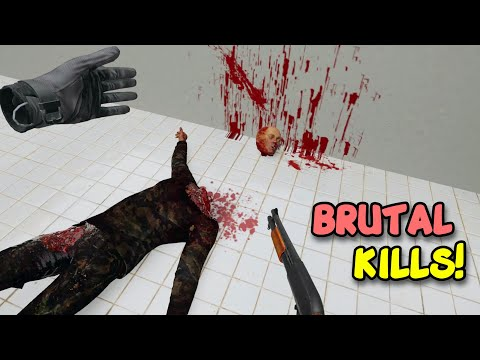

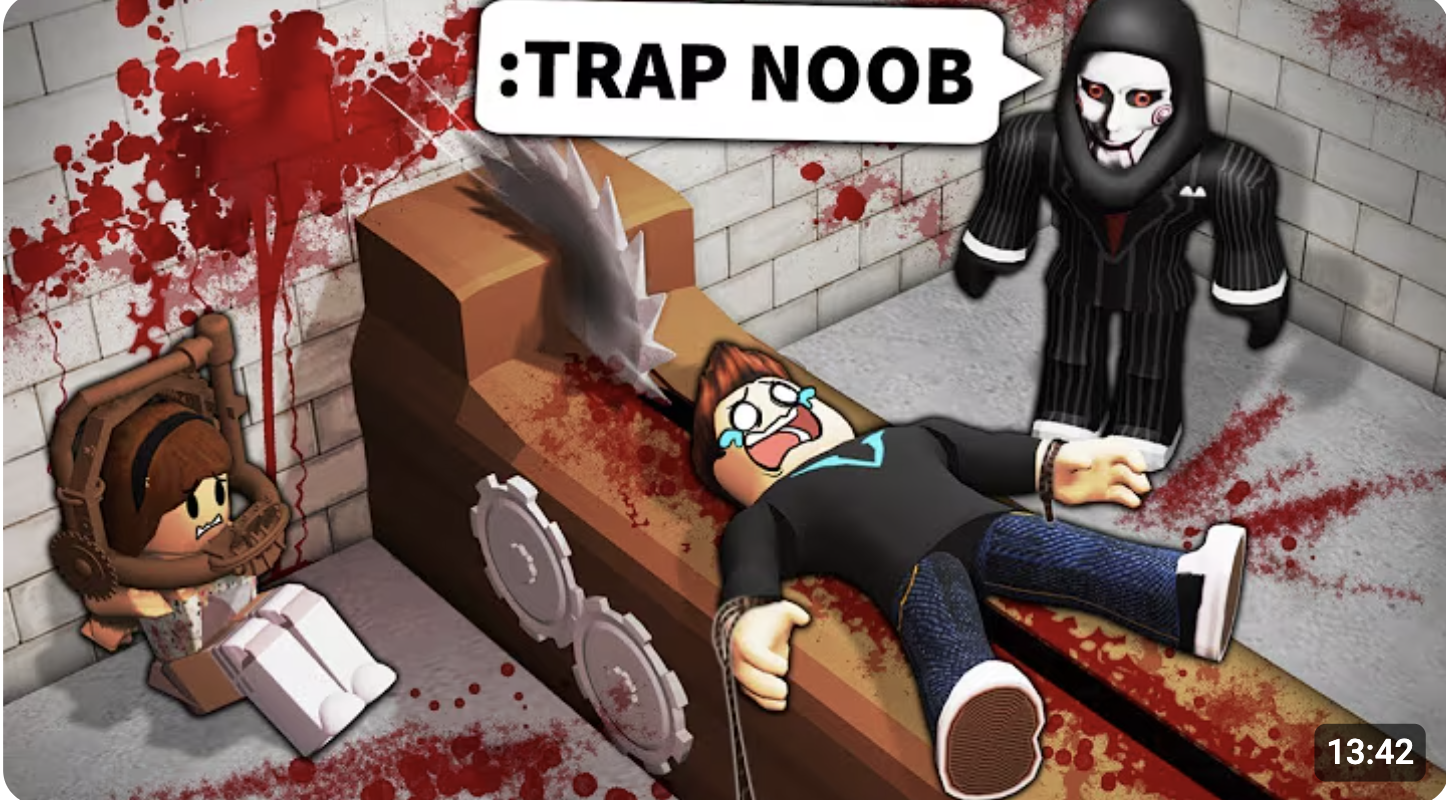

In [ ]:
from IPython.display import Image as img2, display

for entry in overlap_img:
  img_bytes = load_image(entry)  # returns f.read()
  display(img2(data=img_bytes))